In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from google.colab import drive
from array import array
import pandas as pd
import os
import seaborn as sns
drive.mount('/content/gdrive') # 此處需要登入google帳號
data = pd.read_csv("/content/gdrive/My Drive/thesis/thesisdataset/millan_average7_396.csv")
#data = pd.read_csv("1101-1107sorted4.csv")
data.shape

Mounted at /content/gdrive


(1679994, 3)

In [ ]:
nwdaf_data = pd.read_csv("/content/gdrive/My Drive/thesis/thesisdataset/germany_average3_41.csv")
nwdaf_data.shape

(1296000, 7)

In [ ]:
uk_data = pd.read_csv("/content/gdrive/My Drive/thesis/thesisdataset/uk_data_average5_69_v1.csv")
uk_data.shape

(19888, 2)

In [ ]:
!pip install learn2learn

     |████████████████████████████████| 841 kB 8.3 MB/s 
     |████████████████████████████████| 2.9 MB 53.9 MB/s 
     |████████████████████████████████| 135 kB 84.7 MB/s 
     |████████████████████████████████| 96 kB 7.7 MB/s 
     |████████████████████████████████| 55 kB 5.3 MB/s 
     |████████████████████████████████| 156 kB 75.9 MB/s 
     |████████████████████████████████| 1.4 MB 63.3 MB/s 
     |████████████████████████████████| 1.1 MB 59.1 MB/s 
     |████████████████████████████████| 144 kB 92.7 MB/s 
     |████████████████████████████████| 271 kB 77.9 MB/s 
     |████████████████████████████████| 94 kB 4.4 MB/s 
     |████████████████████████████████| 4.0 MB 60.1 MB/s 
  Created wheel for learn2learn: filename=learn2learn-0.1.7-cp37-cp37m-linux_x86_64.whl size=938510 sha256=92e785d640dac10cc1a912e93055f68292cf0e830bbeda8b8b72afcb1c48b9da
  Stored in directory: /root/.cache/pip/wheels/66/29/ac/1d46fdb88fb1fb02491123ef3fcec13d5363eb14fec6f8af05
  Created wheel for qpth: filena

In [ ]:
!nvidia-smi

Mon May  2 13:56:00 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!python -V

Python 3.7.13


In [ ]:
import torch
print(torch.__version__)

1.11.0+cu113


In [ ]:
df = pd.DataFrame(data)
dataset = df.internet.values.astype(float)

In [ ]:
df2 = pd.DataFrame(nwdaf_data)
dataset2 = df2.load.values.astype(float)

In [ ]:
df4 = pd.DataFrame(uk_data)
dataset4 = df4.internet.values.astype(float)

In [ ]:
dataset1000=np.append(dataset2, dataset4)

In [ ]:
dataset1000=np.append(dataset1000, dataset)

In [ ]:

dataset1000.shape

(2995882,)

In [ ]:

dataset1000=dataset1000.reshape(-1,1)

In [ ]:
dataset1000.shape

(2995882, 1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

sc = MinMaxScaler()
dataset1000 = sc.fit_transform(dataset1000)

seq_length = 1

dataset1000 = sc.fit_transform(dataset1000)
x, y = sliding_windows(dataset1000, seq_length)

train_size = 2097200
test_size = len(y) - train_size
#train_size = 1200000
#test_size = 480000
#train_size = 2000000
#test_size = 976000
#test_size = 1018600
dataX = Variable(torch.Tensor(np.array(x)))
dataY= Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

In [ ]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

torch.Size([2097200, 1, 1])
torch.Size([2097200, 1])
torch.Size([898681, 1, 1])
torch.Size([898681, 1])


In [ ]:
trainX=trainX.reshape(10,209720,1,1)
trainY=trainY.reshape(10,209720,1)
testX=testX.reshape(898681,1,1)


testY=testY.reshape(898681,1)

In [ ]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

torch.Size([10, 209720, 1, 1])
torch.Size([10, 209720, 1])
torch.Size([898681, 1, 1])
torch.Size([898681, 1])


In [ ]:
class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):
        super(RNNModel, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        # RNN layers
        self.rnn = nn.RNN(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # Forward propagation by passing in the input and hidden state into the model
        out, h0 = self.rnn(x, h0.detach())

        # Reshaping the outputs in the shape of (batch_size, seq_length, hidden_size)
        # so that it can fit into the fully connected layer
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)
        return out

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import learn2learn as l2l
epochs = 2000
learning_rate = 0.01
meta_learning_rate = 0.01
adaptation_steps = 1
input_dim = 1
hidden_dim = 2
layer_dim = 1  # ONLY CHANGE IS HERE FROM ONE LAYER TO TWO LAYER
output_dim = 1
dropout = 0.2
encoder = RNNModel(input_dim, hidden_dim, layer_dim, output_dim, dropout)
output_layer = nn.Linear(1, 1)
maml = l2l.algorithms.MAML(output_layer, lr=learning_rate, first_order=False)
opt = optim.Adam(list(maml.parameters()) + list(encoder.parameters()), lr=meta_learning_rate)
loss_fn = torch.nn.MSELoss()
for iteration in range(epochs):
    opt.zero_grad()
    iteration_error = 0.0
    for task in range(9):
        learner = maml.clone()
        x_spt = trainX[task]
        y_spt = trainY[task]
        x_qry = trainX[task+1]
        y_qry = trainY[task+1]
        # Fast adapt
        for _ in range(adaptation_steps):
            pred = learner(encoder(x_spt))
            error = loss_fn(pred, y_spt)
            learner.adapt(error)
            print("Epoch: %d, Task: %d, loss: %1.5f" % (iteration, task, error.item()))

        pred = learner(encoder(x_qry))
        evaluation_error = loss_fn(pred, y_qry)
        print(evaluation_error)
        iteration_error += evaluation_error
    # Meta-update the model parameters
    iteration_error /= 10
    print(iteration_error)
    iteration_error.backward()   
    opt.step()


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


串流輸出內容已截斷至最後 5000 行。
Epoch: 1736, Task: 8, loss: 0.00001
tensor(0.0001, grad_fn=<MseLossBackward0>)
tensor(6.4014e-05, grad_fn=<DivBackward0>)
Epoch: 1737, Task: 0, loss: 0.00010
tensor(9.9383e-05, grad_fn=<MseLossBackward0>)
Epoch: 1737, Task: 1, loss: 0.00010
tensor(9.9008e-05, grad_fn=<MseLossBackward0>)
Epoch: 1737, Task: 2, loss: 0.00010
tensor(9.9185e-05, grad_fn=<MseLossBackward0>)
Epoch: 1737, Task: 3, loss: 0.00010
tensor(9.9119e-05, grad_fn=<MseLossBackward0>)
Epoch: 1737, Task: 4, loss: 0.00010
tensor(9.9429e-05, grad_fn=<MseLossBackward0>)
Epoch: 1737, Task: 5, loss: 0.00010
tensor(2.1167e-05, grad_fn=<MseLossBackward0>)
Epoch: 1737, Task: 6, loss: 0.00002
tensor(6.1008e-06, grad_fn=<MseLossBackward0>)
Epoch: 1737, Task: 7, loss: 0.00001
tensor(5.7793e-06, grad_fn=<MseLossBackward0>)
Epoch: 1737, Task: 8, loss: 0.00001
tensor(0.0001, grad_fn=<MseLossBackward0>)
tensor(6.4013e-05, grad_fn=<DivBackward0>)
Epoch: 1738, Task: 0, loss: 0.00010
tensor(9.9383e-05, grad_fn=<MseLoss

In [ ]:
dataX.shape

torch.Size([2995881, 1, 1])

In [ ]:
da

In [ ]:
#epoch3000
from math import sqrt

from sklearn.metrics import mean_absolute_error

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

print("mean_absolute_error:",mean_absolute_error(dataY_plot, data_predict))

print("mean_squared_error:",mean_squared_error(dataY_plot, data_predict))

print("rmse:",sqrt(mean_squared_error(dataY_plot, data_predict)))

print("r2 score:",r2_score(dataY_plot, data_predict))
print("mape_sk", mean_absolute_percentage_error(dataY_plot, data_predict))

mean_absolute_error: 0.005367546
mean_squared_error: 0.000100997706
rmse: 0.01004976148401915
r2 score: 0.712062341861367
mape_sk 215561600.0


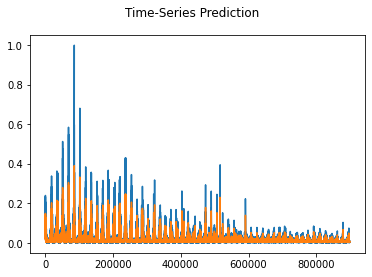

Train Score: 0.01 RMSE


In [ ]:
#epoch2000
learner.eval()
test_predict = learner(encoder(testX))
test_predict = test_predict.data.numpy()
testY_plot = testY.data.numpy()
#data_predict=data_predict.reshape(1, -1)
test_predict = sc.inverse_transform(test_predict)
testY_plot = sc.inverse_transform(testY_plot)

#plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(testY_plot)
plt.plot(test_predict)
plt.suptitle('Time-Series Prediction')
plt.show()
import math
testScore = math.sqrt(mean_squared_error(testY_plot, test_predict))
print('Train Score: %.2f RMSE' % (testScore))
#testScore = math.sqrt(mean_squared_error(testY, test_predict))
#print('Test Score: %.2f RMSE' % (testScore))

In [ ]:
#epoch2000
from math import sqrt

from sklearn.metrics import mean_absolute_error

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

print("mean_absolute_error:",mean_absolute_error(testY_plot, test_predict))

print("mean_squared_error:",mean_squared_error(testY_plot, test_predict))

print("rmse:",sqrt(mean_squared_error(testY_plot, test_predict)))

print("r2 score:",r2_score(testY_plot, test_predict))
print("mape_sk", mean_absolute_percentage_error(testY_plot, test_predict))

mean_absolute_error: 0.0052475105
mean_squared_error: 0.00016472013
rmse: 0.012834333950038437
r2 score: 0.8013401838485268
mape_sk 718605300.0


In [ ]:
import joblib
joblib.dump(learner,"/content/gdrive/My Drive/thesis/PKL/rnnlearner_10task+1_epoch2000_10_length=1_beta0.01.pkl")
joblib.dump(encoder,"/content/gdrive/My Drive/thesis/PKL/rnnencoder_10task+1_epoch2000_10_length=1beta0.01.pkl")

['/content/gdrive/My Drive/thesis/PKL/rnnencoder_10task+1_epoch2000_10_length=1beta0.01.pkl']